<a href="https://colab.research.google.com/github/pradeepganesh25/pradeep/blob/main/classfication_problem_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing packages
import numpy as np
import pandas as pd

In [30]:
# Reading dataset
df = pd.read_csv('/content/Product_Recommendation (1).csv')
df.head()

,Customer_ID,Age,Gender,Location,Income,Browsing_History,Previous_Purchases,Preferred_Device,Product_Category,Time_Spent_on_Site
0,af09abc0-4835-4376-af52-758c10ff7e97,72,Male,Suburban,NaN,Clothing,8,Desktop,Clothing,78.718422
1,00ce02c1-d45a-4e5a-bd6e-d34d11f90647,72,Female,Rural,100071.0,Books,1,Desktop,Clothing,71.882840
2,b59bc34e-84de-4cc2-b45a-8e5254b5b7bf,72,Male,Urban,25734.0,Sports,1,Mobile,Food,105.186397
3,820cb025-c3e9-4a92-9ca6-91fb303b526e,22,Male,Rural,115576.0,Food,7,Desktop,Food,98.117595
4,232f52b9-3f95-4c70-91e3-ec9585c91802,33,Female,Rural,130314.0,Clothing,2,Mobile,Clothing,119.650952


In [3]:
# See the no. of rows and columns
df.shape

(800, 10)

In [4]:
#printing all columns
data_cols = df.columns.tolist()
print(data_cols)

['Customer_ID', 'Age', 'Gender', 'Location', 'Income', 'Browsing_History', 'Previous_Purchases', 'Preferred_Device', 'Product_Category', 'Time_Spent_on_Site']


In [5]:
# Display data type of each feature
df.dtypes

,0
Customer_ID,object
Age,int64
Gender,object
Location,object
Income,float64
Browsing_History,object
Previous_Purchases,int64
Preferred_Device,object
Product_Category,object
Time_Spent_on_Site,float64


In [6]:
df.describe()

,Age,Income,Previous_Purchases,Time_Spent_on_Site
count,800.000000,682.000000,800.000000,773.000000
mean,49.038750,84407.494135,4.916250,62.454720
std,17.784265,38206.118860,2.504911,33.757387
min,18.000000,20194.000000,1.000000,5.091183
25%,34.000000,49362.500000,3.000000,31.734074
50%,49.000000,85488.500000,5.000000,62.892357
75%,64.250000,117173.250000,7.000000,91.772655
max,79.000000,149549.000000,9.000000,119.811766


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         800 non-null    object 
 1   Age                 800 non-null    int64  
 2   Gender              657 non-null    object 
 3   Location            800 non-null    object 
 4   Income              682 non-null    float64
 5   Browsing_History    800 non-null    object 
 6   Previous_Purchases  800 non-null    int64  
 7   Preferred_Device    800 non-null    object 
 8   Product_Category    800 non-null    object 
 9   Time_Spent_on_Site  773 non-null    float64
dtypes: float64(2), int64(2), object(6)
memory usage: 62.6+ KB


In [8]:
# find the null values
df.isnull().sum()

,0
Customer_ID,0
Age,0
Gender,143
Location,0
Income,118
Browsing_History,0
Previous_Purchases,0
Preferred_Device,0
Product_Category,0
Time_Spent_on_Site,27


In [10]:
# Remove unwanted columns
df.drop(columns=['Customer_ID'], inplace=True)  # specify the columns to remove

In [11]:
# Fill numerical columns with mean and categorical columns with the mode
num_columns = df.select_dtypes(include=['float64', 'int64']).columns
cat_columns = df.select_dtypes(include=['object']).columns

In [12]:
df[num_columns] = df[num_columns].fillna(df[num_columns].mean())  # numerical columns
df[cat_columns] = df[cat_columns].fillna(df[cat_columns].mode().iloc[0])  # categorical columns

In [ ]:
# fill the missing values for numerical terms - mean
#df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [ ]:
# fill the missing values for categorical terms - mode
#df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])

In [13]:
# find the null values
df.isnull().sum()

,0
Age,0
Gender,0
Location,0
Income,0
Browsing_History,0
Previous_Purchases,0
Preferred_Device,0
Product_Category,0
Time_Spent_on_Site,0


In [14]:
# Encode categorical features using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in cat_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [15]:
# Scale numerical features with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])

In [17]:
# Split data into train and test sets
# replace 'target_column' with your target column name
X = df.drop('Product_Category', axis=1)  # -- independent variable
y = df['Product_Category'] # -- dependent variable

In [19]:
X.head()

,Age,Gender,Location,Income,Browsing_History,Previous_Purchases,Preferred_Device,Time_Spent_on_Site
0,0.885246,1,1,0.496413,1,0.875,0,0.641796
1,0.885246,0,0,0.617502,0,0.000,0,0.582212
2,0.885246,1,2,0.042828,4,0.000,1,0.872513
3,0.065574,1,0,0.737366,3,0.750,0,0.810896
4,0.245902,0,0,0.851301,1,0.125,1,0.998598


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Train Logistic Regression model
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [22]:
# Evaluate Logistic Regression model
from sklearn.metrics import accuracy_score, confusion_matrix
logreg_pred = logreg_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_conf_matrix = confusion_matrix(y_test, logreg_pred)

In [23]:
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Logistic Regression Confusion Matrix:\n", logreg_conf_matrix)

Logistic Regression Accuracy: 0.175
Logistic Regression Confusion Matrix:
 [[ 3  3  8  2 15]
 [ 2  1  9  6 16]
 [ 3  3  9  6 10]
 [ 3  3 10  1 20]
 [ 1  2  5  5 14]]


In [24]:
#Train Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [25]:
# Evaluate Random Forest Classifier model
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)

In [26]:
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Confusion Matrix:\n", rf_conf_matrix)

Random Forest Accuracy: 0.175
Random Forest Confusion Matrix:
 [[ 5  4  9  3 10]
 [ 3  3  8  7 13]
 [ 2  4  8  6 11]
 [ 6  2  9  3 17]
 [ 1  6  6  5  9]]


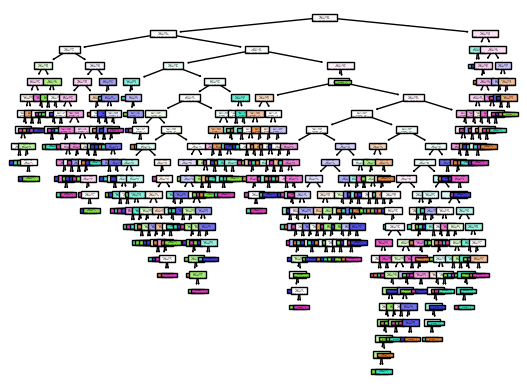

In [27]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plotting the first tree in the forest
plot_tree(rf_model.estimators_[0], filled=True)
plt.show()

In [28]:
# Select the best model
best_model = logreg_model if logreg_accuracy > rf_accuracy else rf_model

In [29]:
# Save the best model as a .pkl file
import pickle

with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Best model saved as 'best_model.pkl'")

Best model saved as 'best_model.pkl'
